In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\OWNER\Desktop\bhp.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
min_threshold,max_threshold=df["price_per_sqft"].quantile([0.001, 0.999])

In [6]:
min_threshold

1366.184

In [7]:
max_threshold

50959.36200000098

In [8]:
outliers1=df[(df["price_per_sqft"]<min_threshold) | (df["price_per_sqft"]>max_threshold)]
#removingthe outlier

In [9]:
df_no_outlier1=df[(df["price_per_sqft"]>min_threshold) & (df["price_per_sqft"]<max_threshold)]

#removng oulier with quantiles

In [10]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

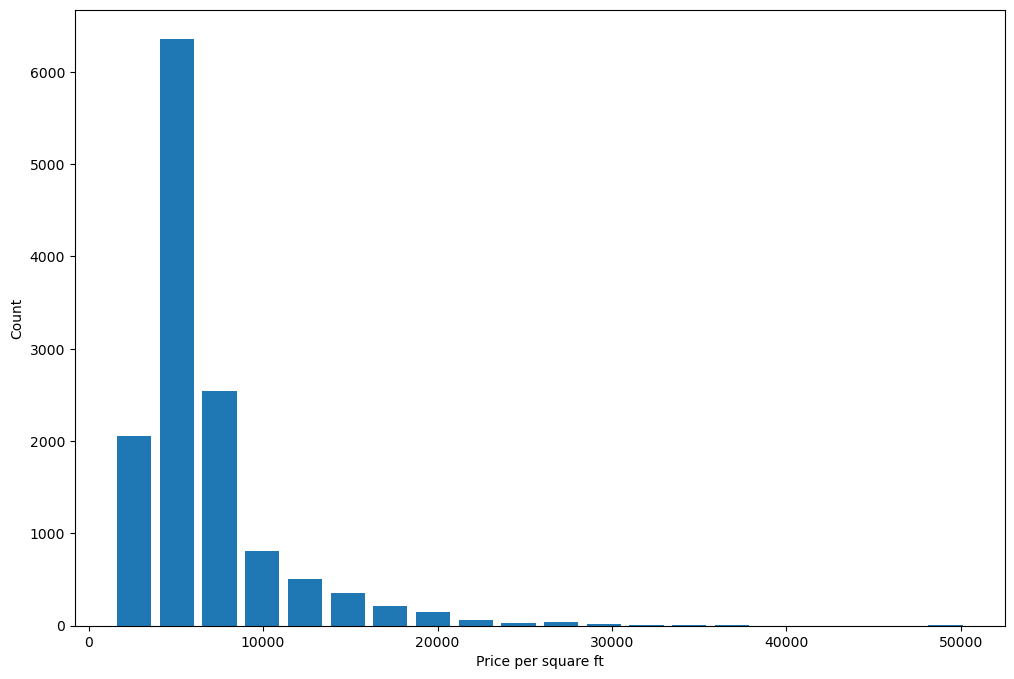

In [12]:
plt.hist(df_no_outlier1.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [17]:
df_no_outlier1.shape

(13172, 7)

In [18]:
df.shape

(13200, 7)

In [21]:
max_limit = df_no_outlier1.price_per_sqft.mean() + 4*df_no_outlier1.price_per_sqft.std()
min_limit = df_no_outlier1.price_per_sqft.mean() - 4*df_no_outlier1.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [23]:
df_no_outlier1[(df_no_outlier1.price_per_sqft>max_limit) | (df_no_outlier1.price_per_sqft<min_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [25]:
df_no_outlier2 = df_no_outlier1[(df_no_outlier1.price_per_sqft>min_limit) & (df_no_outlier1.price_per_sqft<max_limit)]
df_no_outlier2.shape

(13047, 7)

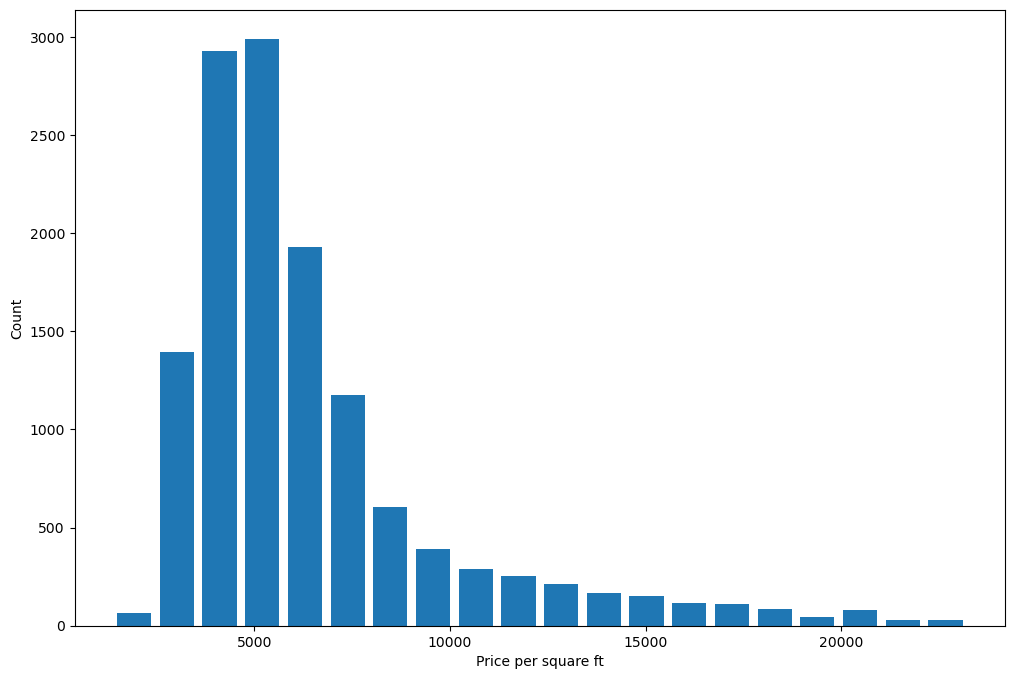

In [26]:
plt.hist(df_no_outlier2.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [27]:
df_no_outlier2["zscore"]=(df_no_outlier2["price_per_sqft"]-df_no_outlier2["price_per_sqft"].mean())/df_no_outlier2["price_per_sqft"].std()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_4880\2313802419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier2["zscore"]=(df_no_outlier2["price_per_sqft"]-df_no_outlier2["price_per_sqft"].mean())/df_no_outlier2["price_per_sqft"].std()


In [28]:
df_no_outlier2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [31]:
outliers_z = df_no_outlier2[(df_no_outlier2.zscore < -4) | (df_no_outlier2.zscore>4)]
outliers_z.shape

(86, 8)

In [32]:
df4 = df_no_outlier2[(df_no_outlier2.zscore>-4)&(df_no_outlier2.zscore<4)]
df4.shape


(12961, 8)

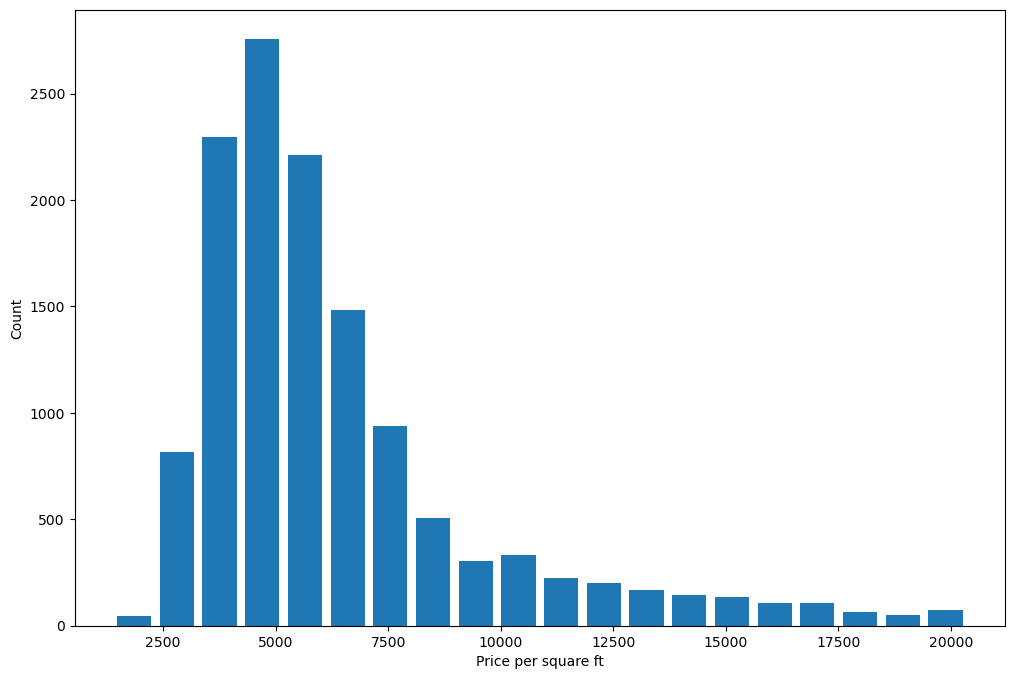

In [33]:
plt.hist(df4.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()